In [67]:
from grover import GroverCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex

In [68]:
circuit = GroverCircuit([3], 1)
circuit.draw()

┌───┐ ░ ┌─────────┐┌─────────────┐
q_0: ┤ H ├─░─┤0        ├┤0            ├
     ├───┤ ░ │  oracle ││  reflection │
q_1: ┤ H ├─░─┤1        ├┤1            ├
     └───┘ ░ └─────────┘└─────────────┘
c: 2/══════════════════════════════════

In [69]:
oracle_operator = Operator(circuit.oracle())
array_to_latex(oracle_operator.data, prefix="U_\\omega = ")

<IPython.core.display.Latex object>

In [70]:
reflection_operator = Operator(circuit.reflection())
array_to_latex(reflection_operator.data, prefix="U_s = ")

<IPython.core.display.Latex object>

In [71]:
ket = Statevector(circuit)
ket.draw('latex')

<IPython.core.display.Latex object>

In [72]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
circuit.measure([0,1], [0,1])
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend), shots=1000)

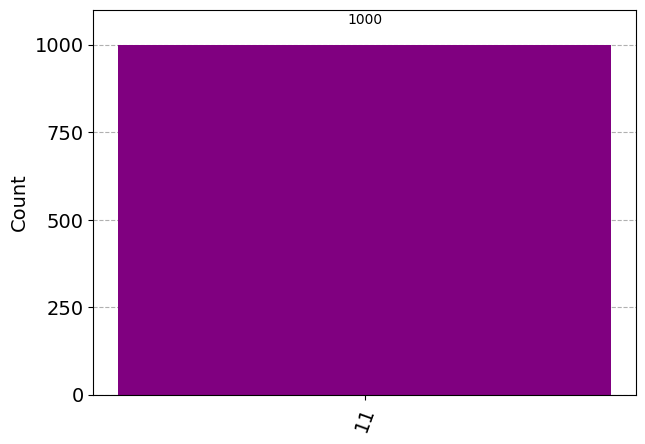

In [74]:
plot_histogram(job.result().get_counts(circuit), color='purple')